### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Environment settings
pd.options.display.max_columns = 30

# Default settings for matplotlib
fig_defaults = {
    'figure.figsize': (10,8),       # Figure size
    'figure.autolayout': True,      # Tight layout
    
    'axes.spines.left': True,       # Keep left spine (y-axis)
    'axes.spines.bottom': True,     # Keep bottom spine (x-axis)
    'axes.spines.right': False,     # Remove right spine
    'axes.spines.top': False,       # Remove top spine

    'axes.facecolor': 'white',      # White background
    'axes.grid': False,             # Remove gridlines
    'grid.linestyle': '--',         # Dashed gridlines (if enabled)

    'axes.titlepad': 20,            # Extra spacing for title
    'axes.labelpad': 20,            # Extra spacing for axis labels

    'axes.titlesize': 20,           # Title font size
    'axes.labelsize': 16,           # X and Y axis label font size
    'legend.fontsize': 16,          # Legend font size
    'xtick.labelsize': 12,          # X-axis tick label size
    'ytick.labelsize': 12,          # Y-axis tick label size
}

LEGENDFONT = 12 # legend font size for multiple subplots


# Default settings for seaborn
import seaborn as sns
sns.set_theme(style="whitegrid", rc=fig_defaults)
sns.set_palette("tab10")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [4]:
# Some numeric columns have string values. Force them to be numeric.
for col in ['temperature', 'age', 'has_children']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
# Percent missing for each column
missing_pct = df.isnull().sum() / df.shape[0] * 100
missing_cols = missing_pct[missing_pct > 0].index.tolist()
missing_pct[missing_cols]

age                     18.409019
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
dtype: float64

In [6]:
# Fix typo for column name
df.rename(columns={'passanger': 'passenger'}, inplace=True)

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Impute missing age with average value
df['age'] = df['age'].fillna(df['age'].mean())

In [8]:
# Drop car (too many missing)
df = df.drop(columns=['car'])

In [9]:
# Drop rows with missing values in restaurant type
for col in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    df = df[df[col].notnull()]

In [10]:
# Confirm no missing values
assert df.isnull().sum().sum() == 0

Print data after making these adjustments

In [11]:
df.shape

(12079, 25)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12079 non-null  object 
 1   passenger             12079 non-null  object 
 2   weather               12079 non-null  object 
 3   temperature           12079 non-null  int64  
 4   time                  12079 non-null  object 
 5   coupon                12079 non-null  object 
 6   expiration            12079 non-null  object 
 7   gender                12079 non-null  object 
 8   age                   12079 non-null  float64
 9   maritalStatus         12079 non-null  object 
 10  has_children          12079 non-null  int64  
 11  education             12079 non-null  object 
 12  occupation            12079 non-null  object 
 13  income                12079 non-null  object 
 14  Bar                   12079 non-null  object 
 15  CoffeeHouse           1

In [13]:
df.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?


In [14]:
# 57% chose to accept the coupon
df['Y'].value_counts(normalize=True)

Y
1    0.569335
0    0.430665
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

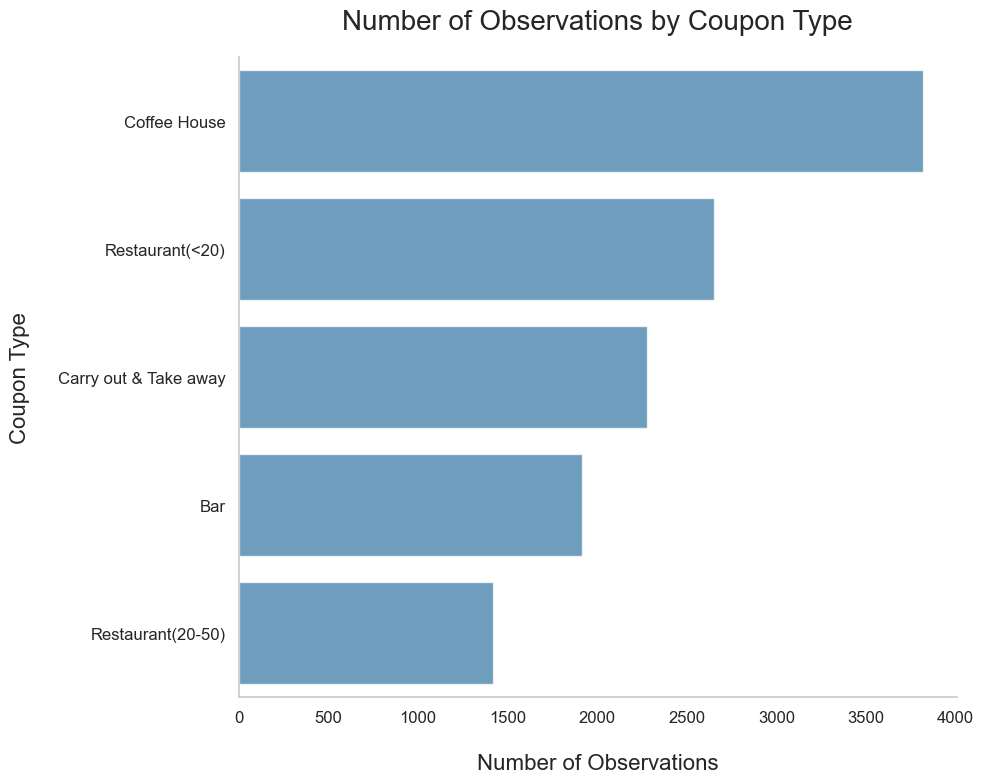

In [15]:
# Number of observations by coupon type
coupon_counts = df['coupon'].value_counts()

sns.barplot(
    y=coupon_counts.index, 
    x=coupon_counts.values,
    color=sns.color_palette()[0], alpha=0.7
)
plt.xlabel('Number of Observations')
plt.ylabel('Coupon Type')
plt.title('Number of Observations by Coupon Type')
plt.show()
plt.close()

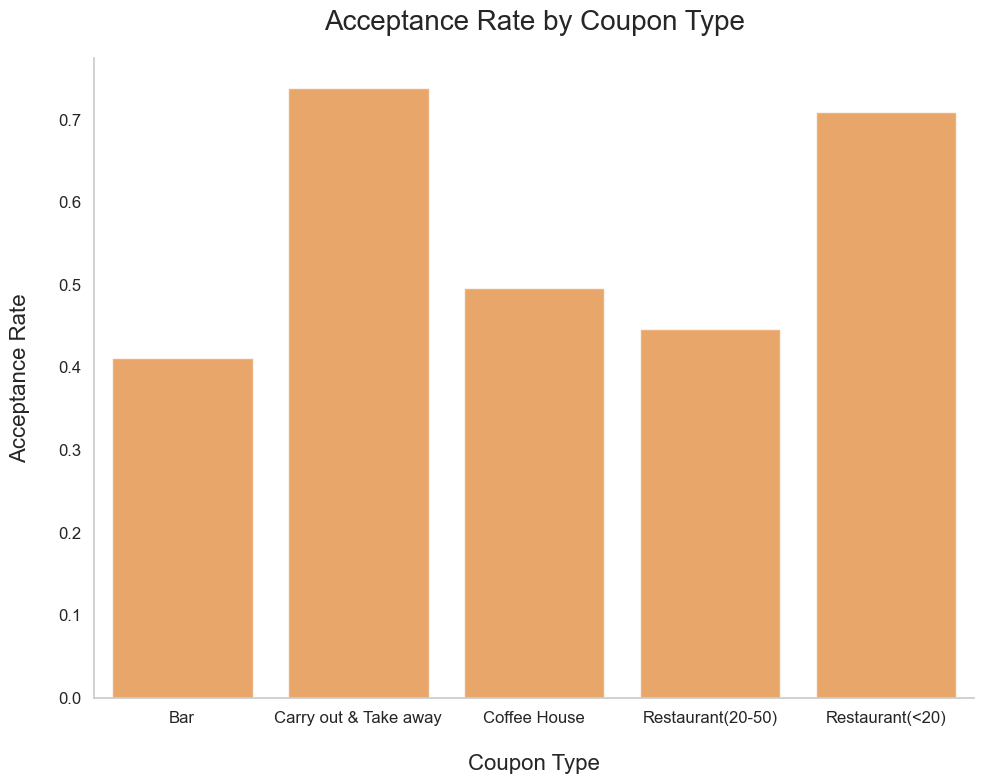

In [16]:
# Acceptance rate by coupon type
coupon_acceptance = df.groupby('coupon')['Y'].mean()

sns.barplot(
    x=coupon_acceptance.index, 
    y=coupon_acceptance.values, 
    color=sns.color_palette()[1], alpha=0.7
)
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Coupon Type')
plt.show()
plt.close()

6. Use a histogram to visualize the temperature column.

temperature
30    0.181720
55    0.303171
80    0.515109
Name: proportion, dtype: float64

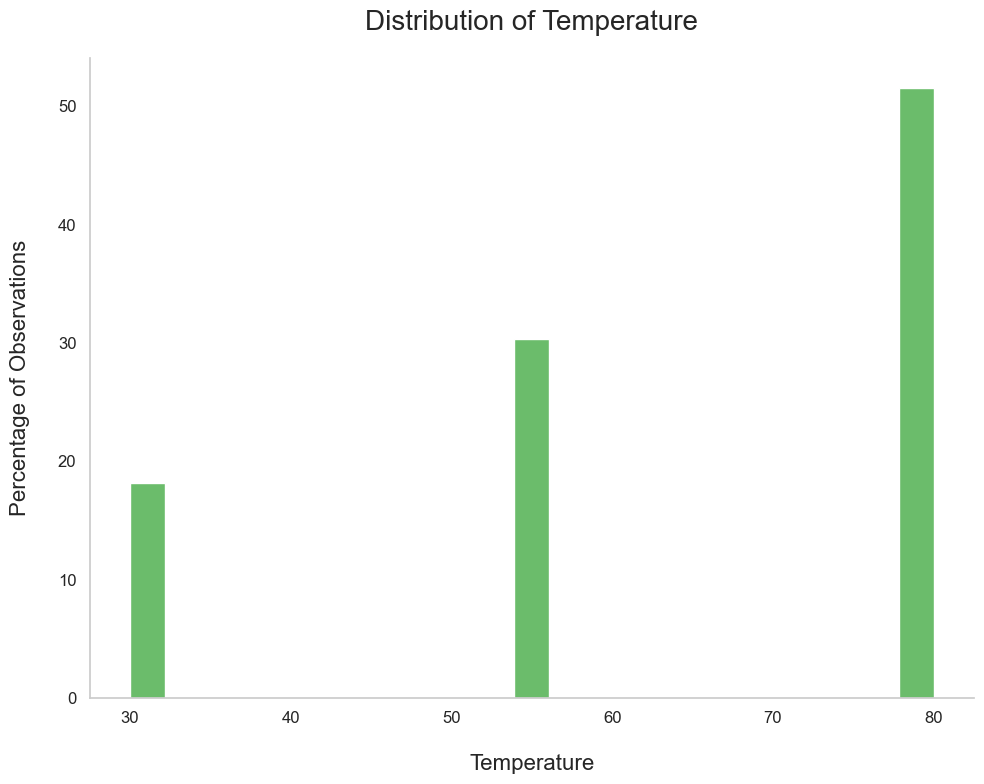

In [17]:
# Temperature has three values: 30F, 55F, or 80F
display(df['temperature'].value_counts(normalize=True).sort_index())

sns.histplot(
    data=df, x='temperature', stat='percent',
    color=sns.color_palette()[2], alpha=0.7
)
plt.xlabel('Temperature')
plt.ylabel('Percentage of Observations')
plt.title('Distribution of Temperature')
plt.show()
plt.close()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
display(df['coupon'].unique().tolist())

['Restaurant(<20)',
 'Coffee House',
 'Bar',
 'Carry out & Take away',
 'Restaurant(20-50)']

In [19]:
bdf = df[df['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [20]:
# 41% of bar coupons were accepted
bdf['Y'].value_counts(normalize=True)

Y
0    0.588082
1    0.411918
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
display(bdf['Bar'].unique().tolist())

['never', 'less1', '1~3', 'gt8', '4~8']

In [22]:
bdf['infrequent'] = df['Bar'].isin(['1~3','less1','never'])

In [23]:
# Acceptance rate for infrequent bar visitors (37%) VS frequent bar visitors (76%)
# Hence lower acceptance rate for infrequent bar visitors
bdf.groupby('infrequent')['Y'].mean() * 100

infrequent
False    76.165803
True     37.267442
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
display(bdf['age'].unique().tolist())

[21.0, 46.0, 26.0, 31.0, 41.0, 29.887815247850035, 36.0]

In [25]:
bdf['plus1_over25'] = bdf['Bar'].isin(['1~3','4~8','gt8']) & (bdf['age'] > 25)

In [26]:
# Higher acceptance rate for bar visitors above age 25 (69% vs 35%)
# Comparable acceptance rate to frequent bar visitors (76%), but slightly lower
bdf.groupby('plus1_over25')['Y'].mean() * 100

plus1_over25
False    33.733333
True     68.280872
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [27]:
display(bdf['Bar'].unique().tolist())
display(bdf['passenger'].unique().tolist())
display(bdf['occupation'].unique().tolist())

['never', 'less1', '1~3', 'gt8', '4~8']

['Friend(s)', 'Alone', 'Kid(s)', 'Partner']

['Architecture & Engineering',
 'Student',
 'Education&Training&Library',
 'Unemployed',
 'Healthcare Support',
 'Healthcare Practitioners & Technical',
 'Sales & Related',
 'Management',
 'Arts Design Entertainment Sports & Media',
 'Computer & Mathematical',
 'Life Physical Social Science',
 'Personal Care & Service',
 'Office & Administrative Support',
 'Construction & Extraction',
 'Legal',
 'Retired',
 'Community & Social Services',
 'Installation Maintenance & Repair',
 'Transportation & Material Moving',
 'Business & Financial',
 'Protective Service',
 'Food Preparation & Serving Related',
 'Production Occupations',
 'Building & Grounds Cleaning & Maintenance',
 'Farming Fishing & Forestry']

In [28]:
bdf['target_group'] = bdf['Bar'].isin(['1~3','4~8','gt8']) & (bdf['passenger'].isin(['Friend(s)','Partner'])) & (bdf['occupation'] != 'Farming Fishing & Forestry')

In [29]:
# Acceptance rate = 72.8% for bar visitors with non-kid passengers and non-farm/fish/forestry occupations
bdf.groupby('target_group')['Y'].mean() * 100

target_group
False    37.877030
True     71.428571
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [30]:
display(bdf['Bar'].unique().tolist())
display(bdf['passenger'].unique().tolist())
display(bdf['maritalStatus'].unique().tolist())
display(bdf['age'].unique().tolist())
display(bdf['RestaurantLessThan20'].unique().tolist())
display(bdf['income'].unique().tolist())

['never', 'less1', '1~3', 'gt8', '4~8']

['Friend(s)', 'Alone', 'Kid(s)', 'Partner']

['Single', 'Married partner', 'Unmarried partner', 'Divorced', 'Widowed']

[21.0, 46.0, 26.0, 31.0, 41.0, 29.887815247850035, 36.0]

['4~8', '1~3', 'less1', 'gt8', 'never']

['$62500 - $74999',
 '$12500 - $24999',
 '$75000 - $87499',
 '$50000 - $62499',
 '$37500 - $49999',
 '$25000 - $37499',
 '$100000 or More',
 '$87500 - $99999',
 'Less than $12500']

In [31]:
# Group 1 = go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
bdf['g1'] = bdf['Bar'].isin(['1~3','4~8','gt8']) & (bdf['passenger'].isin(['Friend(s)','Partner'])) & (bdf['maritalStatus'] != 'Widowed')

# Group 2 = go to bars more than once a month and are under the age of 30
bdf['g2'] = bdf['Bar'].isin(['1~3','4~8','gt8']) & (bdf['age'] < 30)

# Group 3 = go to cheap restaurants more than 4 times a month and income is less than 50K.
bdf['g3'] = bdf['RestaurantLessThan20'].isin(['4~8','gt8']) & (bdf['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))

# Any of the above groups
bdf['g123'] = bdf['g1'] | bdf['g2'] | bdf['g3']


In [32]:
# Acceptance rate = 71% for bar visitors with non-kid passengers who were never widowed
# Acceptance rate = 71% for bar visitors under age 30
# Acceptance rate = 45.6% for frequent cheap restaurant visitors with income less than $50K
# Acceptance rate = 57% when targeting on any of these groups
for group in ['g1','g2','g3','g123']:
    display(bdf.groupby(group)['Y'].mean() * 100)

g1
False    37.877030
True     71.428571
Name: Y, dtype: float64

g2
False    33.508541
True     71.099744
Name: Y, dtype: float64

g3
False    40.253165
True     45.645646
Name: Y, dtype: float64

g123
False    32.636656
True     57.100149
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Insight 1:** Drivers are more likely to accept bar coupons if they are able to abide by the law

**Evidence:** higher acceptance rates for those who are old enough (age 25+) and have passengers who can be their designated drivers after drinking (non-kid passengers)

-----

**Insight 2:** Drivers who have been widowed are less likely to accept bar coupons. Perhaps their widowed spouses were related to drunk-driving related accidents

**Evidence:** higher acceptance rates for bar visitors who were never widowed

-----

**Insight 3:** Drivers from vulnerable backgrounds may be more likely to accept bar coupons

**Evidence:** higher acceptance rates for frequent bar visitors, frequent visitors to cheap restaurants, and lower-income groups

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
# Focus on coffee house visits
cdf = df[df['coupon'] == 'Coffee House'].copy()

In [34]:
# Distribution of past visits to coffee house
cdf['CoffeeHouse'].value_counts(normalize=True).sort_index()

CoffeeHouse
1~3      0.267034
4~8      0.132862
gt8      0.089623
less1    0.275681
never    0.234801
Name: proportion, dtype: float64

In [35]:
# Average acceptance rate (which serves as our benchmark value)
cdf['Y'].mean() * 100

np.float64(49.63312368972746)

In [36]:
cdf.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21.0,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


In [37]:
# Explore acceptance rates by driver attributes
# Some predictive attributes include:
    # desitnation = No urgent place (57%)
    # passenger = friend or partner (56-59%)
    # weather = rainy or sunny (50-51%)
    # temperature = 80F (52%)
    # time = 10 am - 2 pm (54%-63%)
    # education = some HS or HS grad (54-60%)
    # occupations = building, healthcare, student, transportation (61-76%)
    # past usage = more than once (65-68%)
for col in cdf.columns:
    display(cdf.groupby(col)['Y'].mean() * 100)

destination
Home               36.261261
No Urgent Place    57.817828
Work               44.000000
Name: Y, dtype: float64

passenger
Alone        43.393602
Friend(s)    59.744681
Kid(s)       47.150259
Partner      56.701031
Name: Y, dtype: float64

weather
Rainy    51.627907
Snowy    42.807018
Sunny    50.090470
Name: Y, dtype: float64

temperature
30    44.147157
55    45.200984
80    52.697998
Name: Y, dtype: float64

time
10AM    63.477246
10PM    42.907801
2PM     54.545455
6PM     41.227229
7AM     44.000000
Name: Y, dtype: float64

coupon
Coffee House    49.633124
Name: Y, dtype: float64

expiration
1d    58.062611
2h    42.910975
Name: Y, dtype: float64

gender
Female    49.111224
Male      50.189496
Name: Y, dtype: float64

age
21.000000    51.777251
26.000000    51.317440
29.887815    47.470238
31.000000    48.381601
36.000000    46.858639
41.000000    49.211356
46.000000    50.691244
Name: Y, dtype: float64

maritalStatus
Divorced             51.748252
Married partner      49.113233
Single               51.436206
Unmarried partner    47.041420
Widowed              35.294118
Name: Y, dtype: float64

has_children
0    50.169492
1    48.763736
Name: Y, dtype: float64

education
Associates degree                         51.384615
Bachelors degree                          45.611285
Graduate degree (Masters or Doctorate)    50.766610
High School Graduate                      54.044118
Some High School                          60.714286
Some college - no degree                  51.430723
Name: Y, dtype: float64

occupation
Architecture & Engineering                   55.555556
Arts Design Entertainment Sports & Media     50.000000
Building & Grounds Cleaning & Maintenance    72.727273
Business & Financial                         47.183099
Community & Social Services                  37.878788
Computer & Mathematical                      50.115473
Construction & Extraction                    47.826087
Education&Training&Library                   41.391941
Farming Fishing & Forestry                   54.545455
Food Preparation & Serving Related           40.259740
Healthcare Practitioners & Technical         76.056338
Healthcare Support                           61.538462
Installation Maintenance & Repair            56.818182
Legal                                        37.681159
Life Physical Social Science                 47.540984
Management                                   45.387454
Office & Administrative Support              43.750000
Personal Care & Service                      47.619048

income
$100000 or More     48.952381
$12500 - $24999     55.221239
$25000 - $37499     46.515397
$37500 - $49999     54.740608
$50000 - $62499     49.804688
$62500 - $74999     43.542435
$75000 - $87499     29.824561
$87500 - $99999     53.941909
Less than $12500    54.026846
Name: Y, dtype: float64

Bar
1~3      50.067843
4~8      52.197802
gt8      44.660194
less1    50.946970
never    48.264781
Name: Y, dtype: float64

CoffeeHouse
1~3      64.769382
4~8      68.244576
gt8      65.789474
less1    48.098859
never    17.522321
Name: Y, dtype: float64

CarryAway
1~3      50.929112
4~8      50.925926
gt8      50.622407
less1    42.391304
never    48.484848
Name: Y, dtype: float64

RestaurantLessThan20
1~3      49.785671
4~8      51.373626
gt8      52.204176
less1    45.040650
never    40.000000
Name: Y, dtype: float64

Restaurant20To50
1~3      51.631478
4~8      56.830601
gt8      63.736264
less1    49.777531
never    42.592593
Name: Y, dtype: float64

toCoupon_GEQ5min
1    49.633124
Name: Y, dtype: float64

toCoupon_GEQ15min
0    54.525627
1    45.105954
Name: Y, dtype: float64

toCoupon_GEQ25min
0    50.938033
1    34.228188
Name: Y, dtype: float64

direction_same
0    48.935484
1    52.653631
Name: Y, dtype: float64

direction_opp
0    52.653631
1    48.935484
Name: Y, dtype: float64

Y
0      0.0
1    100.0
Name: Y, dtype: float64

In [38]:
# Build flags for predictive attributes
cdf['flag_past_usage'] = cdf['CoffeeHouse'].isin(['1~3','4~8','gt8'])

cdf['flag_education'] = cdf['education'].isin(['High School Graduate', 'Some High School'])
cdf['flag_occupation'] = cdf['occupation'].isin(['Building & Grounds Cleaning & Maintenance','Healthcare Practitioners & Technical', 'Healthcare Support', 'Student','Transportation & Material Moving'])

cdf['flag_weather'] = cdf['weather'].isin(['Sunny','Rainy'])
cdf['flag_temperature'] = cdf['temperature'] == 80

cdf['flag_destination'] = cdf['destination'].isin(['No Urgent Place'])
cdf['flag_passenger'] = cdf['passenger'].isin(['Friend(s)','Partner'])
cdf['flag_time'] = cdf['time'].isin(['10AM','2PM'])



In [39]:
# Sample Size
cdf.shape

(3816, 33)

In [40]:
# Explore combinations of attribute flags for high acceptance rates
flag_cols = [col for col in cdf.columns if 'flag' in col]
rates = cdf.groupby(flag_cols)['Y'].agg(['mean','count']).sort_values(by='mean', ascending=False)

In [41]:
# Focus on combinations with 100+ observations
# Certain combinations can have acceptance rates as high as 79.4% (but also as low as 15.7%)
rates[rates['count'] > 100]

mean  \
flag_past_usage flag_education flag_occupation flag_weather flag_temperature flag_destination flag_passenger flag_time             
True            False          False           True         True             True             True           True       0.748408   
                                                                             False            False          False      0.665541   
                                                            False            False            False          False      0.437209   
False           False          False           True         True             True             True           True       0.368421   
                                                            False            False            False          False      0.204348   
                                                            True             False            False          False      0.193084   

                                                                                                                        count  
flag_past_usage flag_education flag_occupation flag_weather flag_temperature flag_destination flag_passenger flag_time         
True            False          False           True         True             True             True           True         314  
                                                                             False            False          False        296  
                                                            False            False            False          False        215  
False           False          False           True         True             True             True           True         380  
                                                            False            False            False          False        230  
                                                            True             False            False          False        347

In [42]:
# Group flags into four target groups

# Group 1: Frequent visitors to coffee houses
cdf['group_frequent'] = cdf['flag_past_usage']

# Group 2: Responsive demographics
cdf['group_demogs'] = cdf['flag_education'] | cdf['flag_occupation']

# Group 3: Responsive weathers
cdf['group_weather'] = cdf['flag_weather'] | cdf['flag_temperature']

# Group 4: Responsive situations
cdf['group_situations'] = cdf['flag_destination'] | cdf['flag_passenger'] | cdf['flag_time']

In [43]:
# Acceptance rates by target groups
group_cols = [col for col in cdf.columns if 'group' in col]
for col in group_cols:
    display(cdf.groupby(col)['Y'].agg(['mean','count']))


,mean,count
group_frequent,,
False,0.340349,1948
True,0.658994,1868


,mean,count
group_demogs,,
False,0.464906,2878
True,0.592751,938


,mean,count
group_weather,,
False,0.428070,285
True,0.501841,3531


,mean,count
group_situations,,
False,0.396370,1708
True,0.577324,2108


# Insights on coffee houses

**Insight 1:** Coupon acceptance rates are higher for past visitors of coffee houses (31.8 pp difference)

**Insight 2:** Certain occupations and educational attainment can be predictive of high acceptance rates (non-college degree holders in building maintenance, healthcare, transporation, and students). Can make a 12.8 pp difference.

**Insight 3:** Drivers are less likely to accept coupons in colder weather, and more likely to accept in warmer temperature. Can make a 7.4 pp differences

**Insight 4:** Drivers are more likely to accept coffee house coupons in non-urgent situations with friends or partners in the afternoon (18.1 pp difference)